In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [4]:
df_train[show_missing(df_train)].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

- LotFrontage: Linear feet of street connected to property. I can't imagine that this would be 0 (as this would be a property without access), so either impute mean, or maybe see if there's a correlation with LotArea (like square root?).
- Alley: Type of alley access to property -> Many missing values, I would presume that these properties just don't have an alley access.
- MasVnrType/MasVnrArea -> both have 8 values missing, I presume they are the same ones. Either set as "None"/0 or use most frequent value/median.
- Bsmt... Variables: A number of variables in connection with the basement. About the same number of missing values. However, there are two basement-related variables without missing values "BsmtFinSF1" and "BsmtFinSF2" - look at those and then decide what to do with the missing values.
- Electrical: Just one missing value - here just impute most frequent one.
- FireplaceQu: I assume the properties with missing values just don't have a fireplace. There's also the variable Fireplaces (without missing values) - check this and then decide.
- Garage ... Variables: 81 missing in these columns. However, there are some Garage-related variables without missing values: GarageCars, GarageArea - check these and then decide.
- PoolQC - probably no pool - but check against PoolArea (which has no missing values).
- Fence: Many missing values - probably no fence, just impute 'None'
- MiscFeature: Assuming none - probably no special features, just impute 'None'

# LotFrontage/LotArea

In [5]:
# check correlation with LotArea
df_train['LotFrontage'].corr(df_train['LotArea'])

0.42609501877180805

In [6]:
# improvement - and good enough for now
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

0.60200221679393617

Populating the interactive namespace from numpy and matplotlib


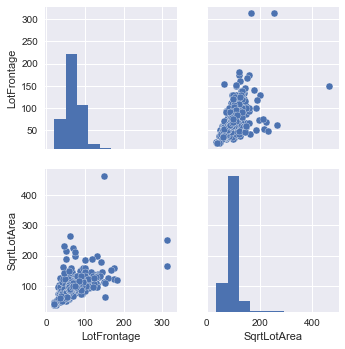

In [7]:
import seaborn as sns
%pylab inline
sns.pairplot(df_train[['LotFrontage','SqrtLotArea']].dropna())

In [8]:
cond = df_train['LotFrontage'].isnull()
df_train.loc[cond, 'LotFrontage']=df_train.SqrtLotArea[cond]

In [9]:
# This column is not needed anymore
del df_train['SqrtLotArea']

# Alley

In [10]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
df_train['Alley'].fillna('None', inplace=True)

# MasVnr

In [12]:
df_train[['MasVnrType','MasVnrArea']][df_train['MasVnrType'].isnull()==True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [13]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [14]:
df_train['MasVnrType'].fillna('None', inplace=True)
df_train['MasVnrArea'].fillna(0.0, inplace=True)

# Basement

In [15]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
df_train[basement_cols][df_train['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [16]:
cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in cols:
    df_train[col].fillna('None', inplace=True)

# Electrical

In [17]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
df_train['Electrical'].fillna('SBrkr', inplace=True)

# Fireplace

In [19]:
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
df_train['Fireplaces'][df_train['FireplaceQu'].isnull()==True].describe()

count    690.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64

In [21]:
df_train['FireplaceQu'].fillna('None', inplace=True)

In [22]:
pd.crosstab(df_train['Fireplaces'], df_train['FireplaceQu'])

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


# Garages

In [23]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df_train[garage_cols][df_train['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [24]:
for col in garage_cols:
    if df_train[col].dtype==np.object:
        df_train[col].fillna('None', inplace=True)
    else:
        df_train[col].fillna(0, inplace=True)

# Pool

In [25]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [26]:
df_train['PoolArea'][df_train['PoolQC'].isnull()==True].describe()

count    1453.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [27]:
df_train['PoolQC'].fillna('None', inplace=True)

# Fence

In [28]:
df_train['Fence'].fillna('None', inplace=True)

# MiscFeature

In [29]:
df_train['MiscFeature'].fillna('None', inplace=True)

In [30]:
df_train[show_missing(df_train)].isnull().sum()

Series([], dtype: float64)